## Análise de Dados do COVID-19

Análise de séries temporais sobre a contaminação do COVID-19.

Dataset utilizado: [Kagle](https://www.kaggle.com/imdevskp/corona-virus-report).

In [9]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#Configurações do MatplotLib

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#Importando os dados
df = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
31530,NaN,Sao Tome and Principe,0.186360,6.613081,2020-05-19,251,8,4
31531,NaN,Yemen,15.552727,48.516388,2020-05-19,167,28,5
31532,NaN,Comoros,-11.645500,43.333300,2020-05-19,11,1,3
31533,NaN,Tajikistan,38.861034,71.276093,2020-05-19,1936,41,641


Antes de iniciarmos a análise existe um fator que devemos nos atentar: 
    
* Os nomes das colunas não podem ter caracteres especiais. 

E para facilitar as análises esses nomes estarão todos em letras minúsculas.


In [4]:
import re
def editando_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [5]:
df.columns = [editando_colunas(col) for col in df.columns]

df

,provincestate,countryregion,lat,long,date,confirmed,deaths,recovered
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
31530,NaN,Sao Tome and Principe,0.186360,6.613081,2020-05-19,251,8,4
31531,NaN,Yemen,15.552727,48.516388,2020-05-19,167,28,5
31532,NaN,Comoros,-11.645500,43.333300,2020-05-19,11,1,3
31533,NaN,Tajikistan,38.861034,71.276093,2020-05-19,1936,41,641


Antes de iniciarmos as análises devemos ter informações sobre o Data Set analisado:

* Tipos de variáveis.

* Número de dados do Data Set.

* Quantidade de dados nulos.

* Quantidade de dados únicos.

**Estatística descritiva sobre o Data Set**

In [6]:
df.describe()

,lat,long,confirmed,deaths,recovered
count,31535.000000,31535.000000,3.153500e+04,31535.000000,31535.000000
mean,21.181891,22.881195,4.809217e+03,320.232218,1439.529761
std,24.904267,70.245542,4.314993e+04,2982.791704,10408.836504
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000
50%,23.634500,21.005900,1.900000e+01,0.000000,1.000000
75%,41.153300,78.000000,4.370000e+02,6.000000,102.000000
max,71.706900,178.065000,1.528568e+06,91921.000000,289392.000000


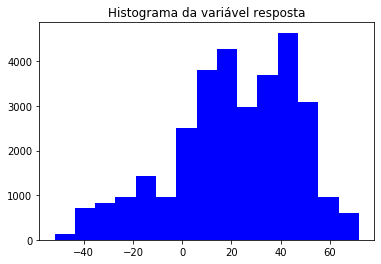

In [14]:
plt.hist(df.lat, color='blue', bins=15)
plt.title('Histograma da variável resposta')
plt.show()

In [ ]:
#Informações sobre o DataSet analisado
covid = pd.DataFrame({'colunas' : df.columns,
                    'tipo': df.dtypes,
                    'nulos' : df.isna().sum(),
                    'quantidade' : df.shape[0],
                    'unicos': df.nunique()})
covid['percentual'] = round(covid['nulos'] / covid['quantidade'],2)

covid

Observando as colunas percebemos que apenas a coluna Province/State possui 70% dos seus valores nulos.

In [ ]:
#Data Inicial
print(min(df['date']))
#Data final 
print(max(df['date']))

O Data Set engloba os casos de covid a partir do dia 22/01/2020 até o dia 19/05/2020.


### Análises dos dados

Vamos analisar os dados do Brasil:

**Primeiro passo:** investigar as variáveis que temos a nossa disposição. 

* Temos as informações disponíveis por Estado?
* Quais variáveis temos disponíveis e podemos trabalhar com essa base de dados?

In [ ]:
df.loc[df.countryregion == 'Brazil']


No Brasil não temos a informação de casos de COVID-19 a nível de estado. Verificaremos algumas outras varíaveis para verificar o avanço do COVID-19 no país.

### Casos Confirmados

A primeira análise diz respeito a curva dos casos confirmados.

In [ ]:
brasil = df.loc[(df.countryregion == 'Brazil') & (df.confirmed > 0)]

In [ ]:
px.line(brasil, 'date', 'confirmed',
        labels={'date':'Data', 'confirmed':'Numero de casos confirmados'},
        title = 'Casos confirmados de COVID-19 no Brasil')

### Número de casos por dia

Para verificar o número de casos por dia devemos antes implementar uma função.

In [ ]:
#Calcula o numero de casos dia
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

In [ ]:
px.line(brasil, x = 'date', y='novoscasos', title='Novos casos de COVID-19 por dia no Brasil',
        labels={'date':'Data', 'novoscasos':'Novos casos'})


### Mortes por COVID-19

Análise do número de mortes no Brasil pelo COVID-19.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter( x =brasil.date, y=brasil.deaths, name='Mortes', mode='lines+markers',
                         line=dict(color='red')))

fig.update_layout(title='Mortes por COVID-19 no Brasil', xaxis_title='Data', yaxis_title='Número de mortes')

fig.show()

Através desde gráfico observa-se que o número de mortos pelo COVID-19 no país segue uma curva exponencial.

### Taxa de crescimento do COVID-19


Verificaremos de forma gráfica a taxa de crescimento por dia dos casos de COVID-19 confirmados no Brasil.



In [ ]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = data.date.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.date.max()
    n = (data_fim - data_inicio).days
    
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas)*100

In [ ]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')

In [ ]:
primeiro_dia = brasil.date.loc[brasil.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, brasil.date.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos de COVID-19 confirmados no Brasil',
       labels={'y':'Taxa de crescimento', 'x':'Data'})